# Multiple Linear regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score


# Load Data Set 

In [3]:
os.chdir('D:\Data science\Batch 52- Day11')
df1=pd.read_csv('50_Startups.csv')
df1


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,New York,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Split x and y

In [4]:
x = df1.iloc[:,:-1].values
print (x)


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'California']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'New York']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'California']
 [100671.96 91790.61 249744.55 'Florida']
 [93863.75 127320.38 249839.44 'California']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'New York']
 [86419.7 153514.11 0.0 'Florida']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'California

In [5]:
y = df1.iloc[:,4].values
print (y)


[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


# Label Encoding 

In [6]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
x[:,3]= Label.fit_transform(x[:,3])
print (x)


[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 0]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 2]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 2]
 [86419.7 153514.11 0.0 1]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 0]
 [67532.53 105751.03 304768.73 0]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 2]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

# One Hot  Encoding 

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print (x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

# Print X as Data Frame

In [8]:
print (pd.DataFrame(x))

      0    1    2          3          4          5
0   0.0  0.0  1.0   165349.2   136897.8   471784.1
1   1.0  0.0  0.0   162597.7  151377.59  443898.53
2   0.0  1.0  0.0  153441.51  101145.55  407934.54
3   0.0  0.0  1.0  144372.41  118671.85  383199.62
4   1.0  0.0  0.0  142107.34   91391.77  366168.42
5   0.0  0.0  1.0   131876.9   99814.71  362861.36
6   1.0  0.0  0.0  134615.46  147198.87  127716.82
7   0.0  0.0  1.0  130298.13  145530.06  323876.68
8   0.0  0.0  1.0  120542.52  148718.95  311613.29
9   1.0  0.0  0.0  123334.88  108679.17  304981.62
10  1.0  0.0  0.0  101913.08  110594.11  229160.95
11  0.0  1.0  0.0  100671.96   91790.61  249744.55
12  1.0  0.0  0.0   93863.75  127320.38  249839.44
13  1.0  0.0  0.0   91992.39  135495.07  252664.93
14  0.0  1.0  0.0  119943.24  156547.42  256512.92
15  0.0  0.0  1.0  114523.61  122616.84  261776.23
16  1.0  0.0  0.0   78013.11  121597.55  264346.06
17  0.0  0.0  1.0   94657.16  145077.58  282574.31
18  0.0  0.0  1.0   91749.16  1

# Split the data as train , test split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x,y,test_size = 0.2,random_state= 42)


# Create the Model

In [11]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

# Predictions

In [12]:
y_pred= reg.predict(x_test)
print (y_pred)


[125685.70020548  84338.92317126  99390.9365877   46818.58913862
 128971.45588834  52062.29882122 109174.11382463  99985.25961747
  97162.65075522 115228.18387684]


# Print Result

In [13]:
result = pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y_test)], axis =1)
print (result)


               0          0
0  125685.700205  134307.35
1   84338.923171   81005.76
2   99390.936588   99937.59
3   46818.589139   64926.08
4  128971.455888  125370.37
5   52062.298821   35673.41
6  109174.113825  105733.54
7   99985.259617  107404.34
8   97162.650755   97427.84
9  115228.183877  122776.86


# Print Y and Prediction in one data frame - Concat

In [15]:
y_pre= pd.DataFrame(y_pred, columns =['Prediction'])
y_te = pd.DataFrame(y_test,columns= ['Actual'])
x_te = pd.DataFrame(x_test,columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_te,y_te,y_pre], axis =1)
print (result)


    CF   FR New Y       R&D      Admin       Mark     Actual     Prediction
0  1.0  0.0   0.0  91992.39  135495.07  252664.93  134307.35  125685.700205
1  1.0  0.0   0.0  38558.51   82982.09   174999.3   81005.76   84338.923171
2  0.0  0.0   1.0  61994.48  115641.28   91131.24   99937.59   99390.936588
3  0.0  0.0   1.0   1000.23  124153.04    1903.93   64926.08   46818.589139
4  0.0  0.0   1.0  94657.16  145077.58  282574.31  125370.37  128971.455888
5  0.0  0.0   1.0    542.05   51743.15        0.0   35673.41   52062.298821
6  0.0  0.0   1.0  75328.87  144135.98  134050.07  105733.54  109174.113825
7  1.0  0.0   0.0  64664.71  139553.16  137962.62  107404.34   99985.259617
8  1.0  0.0   0.0  63408.86  129219.61   46085.25   97427.84   97162.650755
9  0.0  1.0   0.0   86419.7  153514.11        0.0  122776.86  115228.183877


# Accuracy

In [17]:
r2_score(y_test, y_pred)
#Regression Coefficient 
reg.coef_


array([-1.22767929e+03,  1.42750258e+03, -1.99823287e+02,  8.09359318e-01,
       -7.82867439e-02,  2.84635373e-02])

# Regression Intercept

In [18]:
reg.intercept_

55874.21162478979

# Ordinary Least Square Method

In [20]:
x=x.astype('float64')
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog = x)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.14e-27
Time:                        19:21:27   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

# Tune the Model by removing State Column (P Value Greater than 0.05)

# Print the Data Frame

In [21]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,0.0,1.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


# Create the OLS Method by removing the variable which has maximum P Value Remove Column 4 

In [23]:
x_opt=x[:,[0,1,2,3,5]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           8.77e-29
Time:                        19:23:43   Log-Likelihood:                -525.42
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.681e+04   3130.528     14.954      0.0

# Create the OLS Method by removing the variable which has maximum P Value – Remove Column last Column 

In [25]:
x_opt=x[:,[0,1,2,3]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.7
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           2.70e-29
Time:                        19:25:22   Log-Likelihood:                -527.33
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.88e+04   3029.803     16.108      0.0

# All the variables with P Value < 0.05 removed , create the model again with new data set 

# Train test Split 

In [26]:
from sklearn.model_selection import train_test_split
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)


# Create Model  


In [27]:

from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(xopt_train,y_train)


LinearRegression()

# Prediction 

In [28]:
yopt_pred= reg.predict(xopt_test)
print (yopt_pred)


[127104.50547982  81512.65619486 102423.00038457  50380.35153988
 130292.05993635  49989.41467538 113800.41672018 103787.47389111
 102715.93418775 124429.72812971]


# Print Result

In [30]:
result = pd.concat([pd.DataFrame(yopt_pred),pd.DataFrame(y_test)], axis =1)
print (result)


               0          0
0  127104.505480  134307.35
1   81512.656195   81005.76
2  102423.000385   99937.59
3   50380.351540   64926.08
4  130292.059936  125370.37
5   49989.414675   35673.41
6  113800.416720  105733.54
7  103787.473891  107404.34
8  102715.934188   97427.84
9  124429.728130  122776.86


# Print Original Data Frame with Predicted Value

In [31]:
yopt_pre= pd.DataFrame(yopt_pred, columns =['Prediction'])
y_te = pd.DataFrame(y_test,columns= ['Actual'])
x_te = pd.DataFrame(x_test,columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_te,y_te,yopt_pre], axis =1)
print (result)

    CF   FR New Y       R&D      Admin       Mark     Actual     Prediction
0  1.0  0.0   0.0  91992.39  135495.07  252664.93  134307.35  127104.505480
1  1.0  0.0   0.0  38558.51   82982.09   174999.3   81005.76   81512.656195
2  0.0  0.0   1.0  61994.48  115641.28   91131.24   99937.59  102423.000385
3  0.0  0.0   1.0   1000.23  124153.04    1903.93   64926.08   50380.351540
4  0.0  0.0   1.0  94657.16  145077.58  282574.31  125370.37  130292.059936
5  0.0  0.0   1.0    542.05   51743.15        0.0   35673.41   49989.414675
6  0.0  0.0   1.0  75328.87  144135.98  134050.07  105733.54  113800.416720
7  1.0  0.0   0.0  64664.71  139553.16  137962.62  107404.34  103787.473891
8  1.0  0.0   0.0  63408.86  129219.61   46085.25   97427.84  102715.934188
9  0.0  1.0   0.0   86419.7  153514.11        0.0  122776.86  124429.728130


# Check Accuracy 

In [32]:
r2_score(y_test, yopt_pred)

0.9249293035519072

# Prediction for All 50 records 

In [33]:
yfull_pred= reg.predict(x_opt)
print (yfull_pred)


[190609.23760203 187347.6817612  181615.32386645 172711.03054384
 169864.51555813 162049.37901005 163472.15431053 160702.31149604
 152378.44841885 153847.12795634 135569.22118609 136590.30658462
 128701.22207757 127104.50547982 153033.30666787 147242.88204074
 115176.84409958 130292.05993635 127810.84207007 124429.72812971
 113675.78408196 116411.83879774 111748.0620994  106234.4086302
 115263.84038289 103787.47389111 113800.41672018 111051.90479579
 107050.81061953 105504.04499088 102423.00038457 101690.83633675
 102715.93418775  96876.49722904  90305.61901919  88787.85497076
  73983.94331443  86215.22957757  66787.58386077  81512.65619486
  75227.4082158   72412.36305098  68784.4010306   62757.00413938
  67535.95083467  50380.35153988  51815.50502649  48613.0468726
  49989.41467538  48613.0468726 ]


# Accuracy 

In [34]:
r2_score(y, yfull_pred)

0.946607673343172

# Create the Model with only column R& D Spend 

In [35]:
x_opt=x[:,3:4]
x_opt


array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

# Train Test Split 

In [37]:
from sklearn.model_selection import train_test_split
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)


# Print Shape

In [38]:
print (xopt_train.shape)

(40, 1)


# Create Model with one column 

In [39]:
from sklearn.linear_model import LinearRegression
freg= LinearRegression()
freg.fit(xopt_train,y_train)


LinearRegression()

# Prediction and Check accuracy 

In [40]:
yone_pred= freg.predict(x_opt)
r2_score(y, yone_pred)


0.9464943582068932

# Print the result as Graph

<AxesSubplot:>

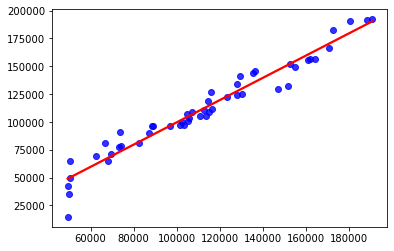

In [42]:
import seaborn as sns
sns.regplot( x = yone_pred, y = y, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)


# Prediction for New Data Set 

# Load new Data Set 

In [43]:
df_Predict=pd.read_csv('50_Startups_Predictions.csv')
df_Predict


,R&D Spend,Administration,Marketing Spend,State
0,120542.52,148718.95,311613.29,New York
1,123334.88,108679.17,304981.62,California
2,101913.08,110594.11,229160.95,California
3,100671.96,91790.61,249744.55,Florida
4,93863.75,127320.38,249839.44,California
5,91992.39,135495.07,252664.93,California
6,119943.24,156547.42,256512.92,Florida
7,114523.61,122616.84,261776.23,New York
8,78013.11,121597.55,264346.06,California
9,72107.60,127864.55,353183.81,New York


# Count Number of Records 

In [44]:
df_Predict.count()

R&D Spend          28
Administration     28
Marketing Spend    28
State              28
dtype: int64

# Create Array 

In [45]:
x_Predict = df_Predict.values
print (x_Predict)


[[120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'California']
 [100671.96 91790.61 249744.55 'Florida']
 [93863.75 127320.38 249839.44 'California']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [72107.6 127864.55 353183.81 'New York']
 [66051.52 182645.56 118148.2 'Florida']
 [65605.48 153032.06 107138.38 'New York']
 [61994.48 115641.28 91131.24 'New York']
 [61136.38 152701.92 88218.23 'New York']
 [63408.86 129219.61 46085.25 'California']
 [55493.95 103057.49 214634.81 'New York']
 [46426.07 157693.92 210797.67 'Florida']
 [46014.02 85047.44 205517.64 'New York']
 [28663.76 127056.21 201126.82 'New York']
 [44069.95 51283.14 197029.42 'California']
 [20229.59 65947.93 185265.1 'New York']
 [38558.51 82982.09 174999.3 'California']
 [22177.74 154806.14 28334.72 'California']
 [10

# Label Encoding

In [47]:
Label_Predict = LabelEncoder()
x_Predict[:,3]= Label_Predict.fit_transform(x_Predict[:,3])
print (x_Predict)


[[120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.06 107138.38 2]
 [61994.48 115641.28 91131.24 2]
 [61136.38 152701.92 88218.23 2]
 [63408.86 129219.61 46085.25 0]
 [55493.95 103057.49 214634.81 2]
 [46426.07 157693.92 210797.67 1]
 [46014.02 85047.44 205517.64 2]
 [28663.76 127056.21 201126.82 2]
 [44069.95 51283.14 197029.42 0]
 [20229.59 65947.93 185265.1 2]
 [38558.51 82982.09 174999.3 0]
 [22177.74 154806.14 28334.72 0]
 [1000.23 124153.04 1903.93 2]
 [1315.46 115816.21 297114.46 1]
 [0.0 135426.92 0.0 0]
 [542.05 51743.15 0.0 2]
 [0.0 116983.8 45173.06 0]]


# One Hot Encoding 

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x_Predict = np.array(ct.fit_transform(x_Predict))
print (x_Predict)


[[0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 61994.48 115641.28 91131.24]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [0.0 0.0 1.0 55493.95 103057.49 214634.81]
 [0.0 1.0 0.0 46426.07 157693.92 210797.67]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 0.0 1.0 28663.76 127056.21 201126.82]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [1.0 0.0 0.0 38558.51 82982.09 174999.3]
 [1.0 0.0 0.0 22177.74 154806.14 28334

# Print X Values 

In [50]:
print (pd.DataFrame(x_Predict))

      0    1    2          3          4          5
0   0.0  0.0  1.0  120542.52  148718.95  311613.29
1   1.0  0.0  0.0  123334.88  108679.17  304981.62
2   1.0  0.0  0.0  101913.08  110594.11  229160.95
3   0.0  1.0  0.0  100671.96   91790.61  249744.55
4   1.0  0.0  0.0   93863.75  127320.38  249839.44
5   1.0  0.0  0.0   91992.39  135495.07  252664.93
6   0.0  1.0  0.0  119943.24  156547.42  256512.92
7   0.0  0.0  1.0  114523.61  122616.84  261776.23
8   1.0  0.0  0.0   78013.11  121597.55  264346.06
9   0.0  0.0  1.0    72107.6  127864.55  353183.81
10  0.0  1.0  0.0   66051.52  182645.56   118148.2
11  0.0  0.0  1.0   65605.48  153032.06  107138.38
12  0.0  0.0  1.0   61994.48  115641.28   91131.24
13  0.0  0.0  1.0   61136.38  152701.92   88218.23
14  1.0  0.0  0.0   63408.86  129219.61   46085.25
15  0.0  0.0  1.0   55493.95  103057.49  214634.81
16  0.0  1.0  0.0   46426.07  157693.92  210797.67
17  0.0  0.0  1.0   46014.02   85047.44  205517.64
18  0.0  0.0  1.0   28663.76  1

# Generate Predicted Values 

In [52]:
xone_Predict= x_Predict[:,3:4]
yone_Predict= freg.predict(xone_Predict)
print (yone_Predict)


[152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 110888.37211903 105718.84707519 105338.10326888
 102255.72078164 101523.23880648 103463.04843113  96706.80916997
  88966.38421611  88614.65458336  73804.31462961  86955.17872572
  66604.83030328  82250.56334619  68267.78888609  50190.4734756
  50459.55667456  49336.66803799  49799.36685472  49336.66803799]


# Display the result as Data Frame – with X 

In [53]:
yone_Predict= pd.DataFrame(yone_Predict, columns =['Prediction'])
x_Predict = pd.DataFrame(x_Predict,columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_Predict,yone_Predict], axis =1)
print (result)


     CF   FR New Y        R&D      Admin       Mark     Prediction
0   0.0  0.0   1.0  120542.52  148718.95  311613.29  152232.860953
1   1.0  0.0   0.0  123334.88  108679.17  304981.62  154616.444880
2   1.0  0.0   0.0  101913.08  110594.11  229160.95  136330.601301
3   0.0  1.0   0.0  100671.96   91790.61  249744.55  135271.169965
4   1.0  0.0   0.0   93863.75  127320.38  249839.44  129459.619903
5   1.0  0.0   0.0   91992.39  135495.07  252664.93  127862.209964
6   0.0  1.0   0.0  119943.24  156547.42  256512.92  151721.310087
7   0.0  0.0   1.0  114523.61  122616.84  261776.23  147095.064559
8   1.0  0.0   0.0   78013.11  121597.55  264346.06  115929.369240
9   0.0  0.0   1.0    72107.6  127864.55  353183.81  110888.372119
10  0.0  1.0   0.0   66051.52  182645.56   118148.2  105718.847075
11  0.0  0.0   1.0   65605.48  153032.06  107138.38  105338.103269
12  0.0  0.0   1.0   61994.48  115641.28   91131.24  102255.720782
13  0.0  0.0   1.0   61136.38  152701.92   88218.23  101523.23

# Display the result with Actual Input Data Set 

In [54]:
yone_Predict= pd.DataFrame(yone_Predict, columns =['Prediction'])
result = pd.concat([df_Predict,yone_Predict], axis =1)
print (result)


    R&D Spend  Administration  Marketing Spend       State     Prediction
0   120542.52       148718.95        311613.29    New York  152232.860953
1   123334.88       108679.17        304981.62  California  154616.444880
2   101913.08       110594.11        229160.95  California  136330.601301
3   100671.96        91790.61        249744.55     Florida  135271.169965
4    93863.75       127320.38        249839.44  California  129459.619903
5    91992.39       135495.07        252664.93  California  127862.209964
6   119943.24       156547.42        256512.92     Florida  151721.310087
7   114523.61       122616.84        261776.23    New York  147095.064559
8    78013.11       121597.55        264346.06  California  115929.369240
9    72107.60       127864.55        353183.81    New York  110888.372119
10   66051.52       182645.56        118148.20     Florida  105718.847075
11   65605.48       153032.06        107138.38    New York  105338.103269
12   61994.48       115641.28         